In [ ]:
!python -c "import monai" || pip install -q "monai-weekly[gdown, nibabel, tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'monai'
     |████████████████████████████████| 642 kB 7.4 MB/s 


In [1]:
!pip install -q monai==0.6.0
!pip install -q tqdm==4.59.0
!pip install -q einops==0.3.0
!pip install -q nibabel==3.1.1
!pip install -q pytorch-lightning==1.4.0
!pip install -q lightning-bolts==0.3.4
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

     |████████████████████████████████| 584 kB 5.2 MB/s 
     |████████████████████████████████| 74 kB 1.5 MB/s 
     |████████████████████████████████| 3.3 MB 5.0 MB/s 
     |████████████████████████████████| 913 kB 5.0 MB/s 
     |████████████████████████████████| 829 kB 47.8 MB/s 
     |████████████████████████████████| 119 kB 44.6 MB/s 
     |████████████████████████████████| 282 kB 63.4 MB/s 
     |████████████████████████████████| 636 kB 57.6 MB/s 
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 294 kB 58.6 MB/s 
     |████████████████████████████████| 142 kB 59.3 MB/s 
     |████████████████████████████████| 253 kB 5.2 MB/s 


In [ ]:
!pip install torchio[plot]

In [ ]:
!pip install -q monai==0.5.2
!pip install -q pytorch-lightning==1.2.10
!pip install -q gdown==3.6.4 matplotlib==3.2.2 pandas==1.1.5 seaborn==0.11.1

     |████████████████████████████████| 495 kB 9.4 MB/s 
     |████████████████████████████████| 841 kB 6.3 MB/s 
     |████████████████████████████████| 176 kB 74.2 MB/s 
     |████████████████████████████████| 269 kB 72.9 MB/s 
     |████████████████████████████████| 119 kB 70.5 MB/s 
     |████████████████████████████████| 829 kB 88.7 MB/s 
     |████████████████████████████████| 1.3 MB 72.1 MB/s 
     |████████████████████████████████| 142 kB 71.3 MB/s 
     |████████████████████████████████| 294 kB 97.9 MB/s 


# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
import pathlib

import os

%cd ..
%cd ./gdrive/MyDrive/kits21

print(os.getcwd())

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/
/gdrive/MyDrive/kits21
/gdrive/MyDrive/kits21


In [ ]:
%cd ./MyDrive/kits21

/gdrive/MyDrive/kits21


# Imports

In [2]:
from monai.utils import first, set_determinism
from monai.transforms import (
    AsDiscrete,
    AsDiscreted,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    ScaleIntensityRanged,
    Spacingd,
    EnsureTyped,
    EnsureType,
    Invertd,
    RandAffined
)
# from monai.handlers.utils import 
from monai.networks.nets import UNet, UNETR, DynUNet
from monai.networks.layers import Norm
from monai.metrics import DiceMetric
from monai.losses import DiceLoss, DiceCELoss
from monai.inferers import sliding_window_inference
from monai.data import CacheDataset, DataLoader, Dataset, decollate_batch,SmartCacheDataset
from monai.config import print_config
from monai.apps import download_and_extract
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import numpy as np

In [ ]:
import os, sys
import numpy as np
# import pandas as pd
# import cv2
# import matplotlib.pyplot as plt
# import nibabel as nib
# import torch
# from torch.utils.data import random_split, DataLoader
# import monai
# # import gdown
# from datetime import datetime
# import pandas as pd
# import torchio as tio
# import pytorch_lightning as pl
# import seaborn as sns; sns.set()
# sns.set_style("whitegrid", {'axes.grid' : False})
# %config InlineBackend.figure_format = 'retina'
# torch.manual_seed(14041931)
# print('TorchIO version:', tio.__version__)

# preprocessing

In [3]:
root_data='kits21/data/'

train_images=[]
train_labels=[]
for case in list(sorted(os.listdir(root_data))):
        train_images.append(root_data+case+"/imaging.nii.gz"),
        train_labels.append(root_data+case+"/aggregated_AND_seg.nii.gz")

data_dicts = [
    {"image": image_name, "label": label_name}
    for image_name, label_name in zip(train_images, train_labels)
]
train_files, val_files = data_dicts[:], data_dicts[-9:]
print(train_files)

[{'image': 'kits21/data/case_00000/imaging.nii.gz', 'label': 'kits21/data/case_00000/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00001/imaging.nii.gz', 'label': 'kits21/data/case_00001/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00002/imaging.nii.gz', 'label': 'kits21/data/case_00002/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00003/imaging.nii.gz', 'label': 'kits21/data/case_00003/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00004/imaging.nii.gz', 'label': 'kits21/data/case_00004/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00005/imaging.nii.gz', 'label': 'kits21/data/case_00005/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00006/imaging.nii.gz', 'label': 'kits21/data/case_00006/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00007/imaging.nii.gz', 'label': 'kits21/data/case_00007/aggregated_AND_seg.nii.gz'}, {'image': 'kits21/data/case_00008/imaging.nii.gz', 'label': 'kits21/data/case_00008/aggregated_

In [4]:
train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Spacingd(keys=["image", "label"], pixdim=(
            2, 1.62, 1.62), mode=("bilinear", "nearest")),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        ScaleIntensityRanged(
            keys=["image"], a_min=-80, a_max=305,
            b_min=0.0, b_max=1.0, clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        RandCropByPosNegLabeld(
            keys=["image", "label"],
            label_key="label",
            spatial_size=(128, 128, 64),
            pos=1,
            neg=1,
            num_samples=4,
            image_key="image",
            image_threshold=0,
        ),
        # user can also add other random transforms
        RandAffined(
            keys=['image', 'label'],
            mode=('bilinear', 'nearest'),
            prob=1.0, spatial_size=(128, 128, 64),
            rotate_range=(0, 0, np.pi/15),
            scale_range=(0.1, 0.1, 0.1)),
     
        EnsureTyped(keys=["image", "label"]),
    ]
)
val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Spacingd(keys=["image", "label"], pixdim=(
            2, 1.62, 1.62), mode=("bilinear", "nearest")),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        ScaleIntensityRanged(
            keys=["image"],a_min=-80, a_max=305,
            b_min=0.0, b_max=1.0, clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        EnsureTyped(keys=["image", "label"]),
    ]
)

image shape: torch.Size([128, 128, 64]), label shape: torch.Size([128, 128, 64])


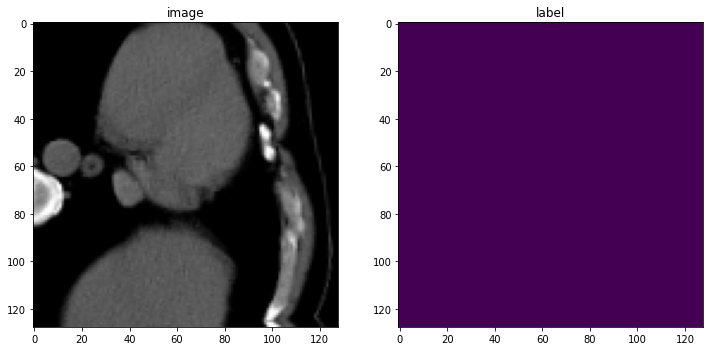

In [5]:
check_ds = Dataset(data=val_files, transform=train_transforms)
check_loader = DataLoader(check_ds, batch_size=1)
check_data = first(check_loader)
image, label = (check_data["image"][0][0], check_data["label"][0][0])
print(f"image shape: {image.shape}, label shape: {label.shape}")
# plot the slice [:, :, 80]
plt.figure("check", (12, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, 60], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, 60])
plt.show()

# Modeling

In [5]:
train_ds = SmartCacheDataset(
    data=train_files, transform=train_transforms,
    cache_rate=0.5, replace_rate=0.5)
# train_ds = monai.data.Dataset(data=train_files, transform=train_transforms)

# use batch_size=2 to load images and use RandCropByPosNegLabeld
# to generate 2 x 4 images for network training
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4)

val_ds = SmartCacheDataset(
    data=val_files, transform=val_transforms, cache_rate=0.5,replace_rate=0.5 )
# val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1, num_workers=4)

Loading dataset: 100%|██████████| 4/4 [00:33<00:00,  8.48s/it]


In [6]:
import torch
import torch.nn as nn

from monai.networks.blocks.convolutions import Convolution, ResidualUnit
from monai.networks.layers.factories import Act, Norm
from monai.networks.layers.simplelayers import SkipConnection
from monai.utils import alias, export

# __all__ = ["UNet", "Unet", "unet"]

# https://github.com/luuuyi/CBAM.PyTorch/blob/master/model/resnet_cbam.py
class ChannelAttention(nn.Module):
    def __init__(self, submodule, in_planes, out_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.submodule = submodule
        self.avg_pool = nn.AdaptiveAvgPool3d(1)
        self.max_pool = nn.AdaptiveMaxPool3d(1)
        self.in_planes = in_planes
        self.fc = nn.Sequential(nn.Conv3d(in_planes, in_planes // ratio, 1, bias=False),
                               nn.GELU(),
                               nn.Conv3d(in_planes // ratio, out_planes, 1, bias=False))
        # self.conv_1 = nn.Conv3d()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # print("CAT X = ", x.shape, flush=True)
        y = self.submodule(x)
        # print("CAT Y = ", y.shape, flush=True)
        x_av = self.avg_pool(x)
        # print("CAT AVG MID = ", x.shape,  self.in_planes, flush=True)
        # print("FC = ", self.fc, flush=True)
        avg_out = self.fc(x_av)
        # print("CAT AVG = ", avg_out.shape, self.in_planes, flush=True)
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        # print("CA output = ", y.shape, out.shape, avg_out.shape, self.in_planes, flush=True)
        # print("CHANNEL = ", out.shape)
        return y*self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, submodule, in_channels, kernel_size=7, out_channels=None, add_conv_1x1=False):
        super(SpatialAttention, self).__init__()
        self.submodule = submodule
        self.conv_flat = nn.Conv3d(in_channels, in_channels, 1, bias=False)
        self.conv1 = nn.Conv3d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        # self.conv2 = nn.Conv3d(4, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.pool_layer = nn.MaxPool3d(2)
        self.upscale_layer = nn.Upsample(scale_factor=2, mode='nearest')
        self.gelu = nn.GELU()
        self.sigmoid = nn.Sigmoid()
        self.add_conv_1x1 = add_conv_1x1
        if add_conv_1x1:
            if out_channels is None:
                raise Exception("Out channels needed for conv 1x1")
            self.conv_1x1 = nn.Conv3d(in_channels, out_channels, 1, bias=False)
            self.act = torch.nn.PReLU()

    def forward(self, x):
        # print("#"*30)
        # print("SUB = ", self.submodule, "\n", x.shape, flush=True)
        # print("ORIG = ", x.shape)
        y = self.submodule(x)
        # x_2 = self.conv_flat(x)
        # print("X2 = ", x_2.shape)
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        # print("X = ", x.shape, y.shape, avg_out.shape, max_out.shape, flush=True)
        x = torch.cat([avg_out, max_out], dim=1)
        # print("X2 = ", x.shape, flush=True)
        x = self.conv1(x)
        if x.shape[-1] > y.shape[-1]:
            x = self.pool_layer(x)
        elif x.shape[-1] < y.shape[-1]:
            x = self.upscale_layer(x)
        # print("X3 = ", x.shape, y.shape, flush=True)
        # print("SPATIAL = ", x.shape)
        x = y*self.sigmoid(x)
        if self.add_conv_1x1:
            x = self.conv_1x1(x)
            x = self.act(x)
        return x

class ConvBlock(nn.Module):
    def __init__(self, in_c=32, out_c=32, kernel_size=3, activation=nn.GELU):
        super(SpatialAttention, self).__init__()

        self.conv1 = nn.Conv3d(n_c, out_c, kernel_size, padding=kernel_size//2, bias=False)
        self.batchnorm = nn.BatchNorm3d(out_c)
        self.activation = activation()
        self.conv2 = nn.Conv3d(out_c, out_c, kernel_size, padding=kernel_size//2, bias=False)
        self.batchnorm2 = nn.BatchNorm3d(out_c)
        self.activation2 = activation()

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.activation2(x)
        return x
        
# Copyright 2020 - 2021 MONAI Consortium
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import warnings
from typing import Sequence, Tuple, Union

import torch
import torch.nn as nn

from monai.networks.blocks.convolutions import Convolution, ResidualUnit
from monai.networks.layers.factories import Act, Norm
from monai.networks.layers.simplelayers import SkipConnection
from monai.utils import alias, export

__all__ = ["UNet", "Unet", "unet"]


@export("monai.networks.nets")
@alias("Unet")
class UNet(nn.Module):
    def __init__(
        self,
        dimensions: int,
        in_channels: int,
        out_channels: int,
        channels: Sequence[int],
        strides: Sequence[int],
        kernel_size: Union[Sequence[int], int] = 3,
        up_kernel_size: Union[Sequence[int], int] = 3,
        num_res_units: int = 0,
        act: Union[Tuple, str] = Act.PRELU,
        norm: Union[Tuple, str] = Norm.INSTANCE,
        dropout=0.0,
    ) -> None:
        """
        Enhanced version of UNet which has residual units implemented with the ResidualUnit class.
        The residual part uses a convolution to change the input dimensions to match the output dimensions
        if this is necessary but will use nn.Identity if not.
        Refer to: https://link.springer.com/chapter/10.1007/978-3-030-12029-0_40.

        Args:
            dimensions: number of spatial dimensions.
            in_channels: number of input channels.
            out_channels: number of output channels.
            channels: sequence of channels. Top block first. The length of `channels` should be no less than 2.
            strides: sequence of convolution strides. The length of `stride` should equal to `len(channels) - 1`.
            kernel_size: convolution kernel size, the value(s) should be odd. If sequence,
                its length should equal to dimensions. Defaults to 3.
            up_kernel_size: upsampling convolution kernel size, the value(s) should be odd. If sequence,
                its length should equal to dimensions. Defaults to 3.
            num_res_units: number of residual units. Defaults to 0.
            act: activation type and arguments. Defaults to PReLU.
            norm: feature normalization type and arguments. Defaults to instance norm.
            dropout: dropout ratio. Defaults to no dropout.

        Note: The acceptable spatial size of input data depends on the parameters of the network,
            to set appropriate spatial size, please check the tutorial for more details:
            https://github.com/Project-MONAI/tutorials/blob/master/modules/UNet_input_size_constrains.ipynb.
            Typically, when using a stride of 2 in down / up sampling, the output dimensions are either half of the
            input when downsampling, or twice when upsampling. In this case with N numbers of layers in the network,
            the inputs must have spatial dimensions that are all multiples of 2^N.
            Usually, applying `resize`, `pad` or `crop` transforms can help adjust the spatial size of input data.

        """
        super().__init__()

        if len(channels) < 2:
            raise ValueError(
                "the length of `channels` should be no less than 2.")
        delta = len(strides) - (len(channels) - 1)
        if delta < 0:
            raise ValueError(
                "the length of `strides` should equal to `len(channels) - 1`.")
        if delta > 0:
            warnings.warn(f"`len(strides) > len(channels) - 1`, the last {delta} values of strides will not be used.")
        if isinstance(kernel_size, Sequence):
            if len(kernel_size) != dimensions:
                raise ValueError(
                    "the length of `kernel_size` should equal to `dimensions`.")
        if isinstance(up_kernel_size, Sequence):
            if len(up_kernel_size) != dimensions:
                raise ValueError(
                    "the length of `up_kernel_size` should equal to `dimensions`.")

        self.dimensions = dimensions
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.channels = channels
        self.strides = strides
        self.kernel_size = kernel_size
        self.up_kernel_size = up_kernel_size
        self.num_res_units = num_res_units
        self.act = act
        self.norm = norm
        self.dropout = dropout
        # self.ca1 = ChannelAttention(16)
        # self.ca1 = ChannelAttention(16)
        # self.sa1 = SpatialAttention()
        # self.sa2 = SpatialAttention()
        # self.sa3 = SpatialAttention()

        def _create_block(
            inc: int,
            outc: int,
            channels: Sequence[int],
            strides: Sequence[int],
            is_top: bool) -> nn.Sequential:
            """
            Builds the UNet structure from the bottom up by recursing down to the bottom block, then creating sequential
            blocks containing the downsample path, a skip connection around the previous block, and the upsample path.

            Args:
                inc: number of input channels.
                outc: number of output channels.
                channels: sequence of channels. Top block first.
                strides: convolution stride.
                is_top: True if this is the top block.
            """
            print("IN CREATE BLOCK : ", inc, outc, channels, strides, is_top)
            c = channels[0]
            s = strides[0]
            print(c, channels)
            subblock: nn.Module
            if len(channels)>2:
                # continue recursion down
                subblock = _create_block(
                    c, c, channels[1:], strides[1:], False)                
                upc = c * 2
                if len(channels) > len(self.channels)-1:
                    add_spatial = True
                    add_channel = False
                else:
                    add_spatial = False
                    add_channel = False
            else:
                # the next layer is the bottom so stop recursion, create the bottom layer as the sublock for this layer
                # print("## : CHANNELS = ", c, channels)
                subblock = self._get_bottom_layer(c, channels[1])
                print("CREATED bottom LAYER : ", inc, outc, channels, strides, is_top)
                subblock = ChannelAttention(subblock, in_planes=c, out_planes=channels[1])
                # subblock = ChannelAttention(subblock, in_planes=channels[0])
                upc = c + channels[1]
                add_spatial = False
                add_channel = False

            # create layer in downsampling path
            down = self._get_down_layer(inc, c, s, is_top)
            print("CREATED DOWN LAYER : ", inc, c, s, is_top)
            if add_spatial:
                down = SpatialAttention(down, in_channels=inc)
            # if add_channel:
            #     down = ChannelAttention(down, in_planes=inc, out_planes=c)

            # create layer in upsampling path
            if len(channels)==len(self.channels) and add_spatial:
                up = self._get_up_layer(upc, upc, s, is_top)
            else:
                up = self._get_up_layer(upc, outc, s, is_top)
            print("CREATED UP LAYER : ", upc, outc, s, is_top)
            # print(up, flush=True)
            if add_spatial:
                # print("CHANNELS = ", len(channels), channels[0], channels[1], flush=True)
                print("CH = ",channels, len(channels))
                add_conv_1x1 = len(channels)==len(self.channels)
                up = SpatialAttention(up, in_channels=upc, out_channels=outc, add_conv_1x1=add_conv_1x1)
            # if add_channel:
            #     up = ChannelAttention(up, in_planes=upc, out_planes=outc)

            print("OUT OF CREATE BLOCK : ", inc, outc, channels, strides, is_top)
            return nn.Sequential(down, SkipConnection(subblock), up)

        self.model = _create_block(
            in_channels, out_channels, self.channels, self.strides, True)

    def _get_down_layer(self,
        in_channels: int,
        out_channels: int,
        strides: int,
        is_top: bool) -> nn.Module:
        """ 
        Args:
            in_channels: number of input channels.
            out_channels: number of output channels.
            strides: convolution stride.
            is_top: True if this is the top block.
        """
        # print("CREATING DOWN LAYER : ", in_channels, out_channels, strides, is_top)
        if self.num_res_units > 0:
            return ResidualUnit(
                self.dimensions,
                in_channels,
                out_channels,
                strides=strides,
                kernel_size=self.kernel_size,
                subunits=self.num_res_units,
                act=self.act,
                norm=self.norm,
                dropout=self.dropout,
            )
        return Convolution(
            self.dimensions,
            in_channels,
            out_channels,
            strides=strides,
            kernel_size=self.kernel_size,
            act=self.act,
            norm=self.norm,
            dropout=self.dropout,
        )

    def _get_bottom_layer(self, in_channels: int, out_channels: int) -> nn.Module:
        """
        Args:
            in_channels: number of input channels.
            out_channels: number of output channels.
        """
        # print("CREATING bottom LAYER : ", in_channels, out_channels)
        return self._get_down_layer(in_channels, out_channels, 1, False)

    def _get_up_layer(self, in_channels: int, out_channels: int, strides: int, is_top: bool) -> nn.Module:
        """
        Args:
            in_channels: number of input channels.
            out_channels: number of output channels.
            strides: convolution stride.
            is_top: True if this is the top block.
        """
        # print("CREATING UP LAYER : ", in_channels, out_channels, strides, is_top)
        conv: Union[Convolution, nn.Sequential]

        conv = Convolution(
            self.dimensions,
            in_channels,
            out_channels,
            strides=strides,
            kernel_size=self.up_kernel_size,
            act=self.act,
            norm=self.norm,
            dropout=self.dropout,
            conv_only=is_top and self.num_res_units == 0,
            is_transposed=True,
        )

        if self.num_res_units > 0:
            ru = ResidualUnit(
                self.dimensions,
                out_channels,
                out_channels,
                strides=1,
                kernel_size=self.kernel_size,
                subunits=1,
                act=self.act,
                norm=self.norm,
                dropout=self.dropout,
                last_conv_only=is_top,
            )
            conv = nn.Sequential(conv, ru)

        return conv

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.model(x)
        return x


Unet = unet = UNet

In [7]:
device = torch.device("cuda:0")

# model = UNet(
#     dimensions=3,
#     in_channels=1,
#     out_channels=4,
#     channels=(16, 32, 64, 128, 256),
#     strides=(2, 2, 2, 2),
#     num_res_units=2,
#     norm="INSTANCE",
# ).to(device)

# model=DynUNet(
#     spatial_dims =3,
#     in_channels=1,
#     out_channels=4,
#     kernel_size=(3,3,3,3,3), 
#     strides=(2,2,2,2,2), 
#     upsample_kernel_size=(3,3,3,3),
#     deep_supervision=True, 
#     deep_supr_num=1, 
#     res_block=True
# ).to(device)

# model = UNETR(
#             in_channels=1,
#             out_channels=4,
#             img_size=(96, 96, 64),
#             feature_size=16,
#             hidden_size=768,
#             mlp_dim=3072,
#             num_heads=12,
#             pos_embed="perceptron",
#             norm_name="batch",
#             res_block=True,
#             conv_block=True,
#             dropout_rate=0.0,
#         ).to(device)

model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=4,
    channels=(32, 64, 128, 128),
    strides=(2, 2, 2), 
).to(device)

loss_function = DiceCELoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.AdamW(model.parameters(), 1e-3)
dice_metric = DiceMetric(include_background=False, reduction="mean")


root_dir='checkpoints'

IN CREATE BLOCK :  1 4 (32, 64, 128, 128) (2, 2, 2) True
32 (32, 64, 128, 128)
IN CREATE BLOCK :  32 32 (64, 128, 128) (2, 2) False
64 (64, 128, 128)
IN CREATE BLOCK :  64 64 (128, 128) (2,) False
128 (128, 128)
CREATED bottom LAYER :  64 64 (128, 128) (2,) False
CREATED DOWN LAYER :  64 128 2 False
CREATED UP LAYER :  256 64 2 False
OUT OF CREATE BLOCK :  64 64 (128, 128) (2,) False
CREATED DOWN LAYER :  32 64 2 False
CREATED UP LAYER :  128 32 2 False
OUT OF CREATE BLOCK :  32 32 (64, 128, 128) (2, 2) False
CREATED DOWN LAYER :  1 32 2 True
CREATED UP LAYER :  64 4 2 True
CH =  (32, 64, 128, 128) 4
OUT OF CREATE BLOCK :  1 4 (32, 64, 128, 128) (2, 2, 2) True


In [ ]:
mode

In [ ]:
loss_function = DiceLoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.AdamW(model.parameters(), 1e-3)
dice_metric = DiceMetric(include_background=False, reduction="mean")

In [ ]:
max_epochs = 300
val_interval = 1
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []
post_pred = Compose([EnsureType(), AsDiscrete(argmax=True, to_onehot=True, n_classes=4)])
post_label = Compose([EnsureType(), AsDiscrete(to_onehot=True, n_classes=4)])

for epoch in range(max_epochs):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        inputs, labels = (
            batch_data["image"].to(device),
            batch_data["label"].to(device),
        )
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(
            f"{step}/{len(train_ds) // train_loader.batch_size}, "
            f"train_loss: {loss.item():.4f}")
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            for val_data in val_loader:
                val_inputs, val_labels = (
                    val_data["image"].to(device),
                    val_data["label"].to(device),
                )
                roi_size = (128,128, 64)
                sw_batch_size = 4
                val_outputs = sliding_window_inference(
                    val_inputs, roi_size, sw_batch_size, model)
                val_outputs = [post_pred(i) for i in decollate_batch(val_outputs)]
                val_labels = [post_label(i) for i in decollate_batch(val_labels)]
                # compute metric for current iteration
                dice_metric(y_pred=val_outputs, y=val_labels)

            # aggregate the final mean dice result
            metric = dice_metric.aggregate().item()
            # reset the status for next validation round
            dice_metric.reset()

            metric_values.append(metric)
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), os.path.join(
                    root_dir, "best_metric_model.pth"))
                print("saved new best metric model")
            print(
                f"current epoch: {epoch + 1} current mean dice: {metric:.4f}"
                f"\nbest mean dice: {best_metric:.4f} "
                f"at epoch: {best_metric_epoch}"
            )

Streaming output truncated to the last 5000 lines.
45/75, train_loss: 0.4758
46/75, train_loss: 0.3646
47/75, train_loss: 0.5495
48/75, train_loss: 0.4747
49/75, train_loss: 0.5263
50/75, train_loss: 0.4642
51/75, train_loss: 0.5477
52/75, train_loss: 0.5697
53/75, train_loss: 0.5039
54/75, train_loss: 0.3999
55/75, train_loss: 0.5910
56/75, train_loss: 0.4486
57/75, train_loss: 0.5930
58/75, train_loss: 0.4915
59/75, train_loss: 0.4970
60/75, train_loss: 0.5383
61/75, train_loss: 0.6019
62/75, train_loss: 0.5258
63/75, train_loss: 0.5205
64/75, train_loss: 0.4631
65/75, train_loss: 0.4912
66/75, train_loss: 0.5457
67/75, train_loss: 0.5168
68/75, train_loss: 0.5099
69/75, train_loss: 0.4417
70/75, train_loss: 0.5033
71/75, train_loss: 0.5268
72/75, train_loss: 0.5420
73/75, train_loss: 0.6147
74/75, train_loss: 0.6466
75/75, train_loss: 0.5530
epoch 43 average loss: 0.4972
current epoch: 43 current mean dice: 0.7500
best mean dice: 0.7549 at epoch: 39
----------
epoch 44/300
1/75, tra

In [ ]:
print(
    f"train completed, best_metric: {best_metric:.4f} "
    f"at epoch: {best_metric_epoch}")

train completed, best_metric: 0.4870 at epoch: 88


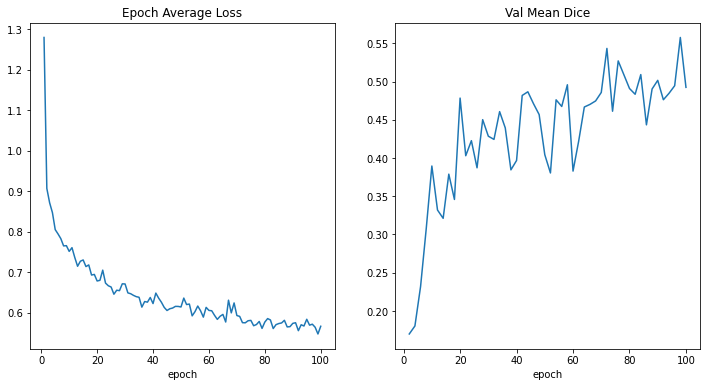

In [ ]:
plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Val Mean Dice")
x = [val_interval * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.show()

In [ ]:
model.load_state_dict(torch.load(
    os.path.join(root_dir, "best_metric_model.pth")))
model.eval()
with torch.no_grad():
    for i, val_data in enumerate(val_loader):
        roi_size = (128, 128, 64)
        sw_batch_size = 4
        val_outputs = sliding_window_inference(
            val_data["image"].to(device), roi_size, sw_batch_size, model
        )
        # plot the slice [:, :, 80]
        plt.figure("check", (18, 6))
        plt.subplot(1, 3, 1)
        plt.title(f"image {i}")
        plt.imshow(val_data["image"][0, 0, :, :, 40], cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title(f"label {i}")
        plt.imshow(val_data["label"][0, 0, :, :, 40])
        plt.subplot(1, 3, 3)
        plt.title(f"output {i}")
        plt.imshow(torch.argmax(
            val_outputs, dim=1).detach().cpu()[0, :, :, 40])
        plt.show()
        if i == 2:
            break

#Testing

In [ ]:
val_org_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Spacingd(keys=["image"], pixdim=(
             2, 1.62, 1.62), mode="bilinear"),
        Orientationd(keys=["image"], axcodes="RAS"),
        ScaleIntensityRanged(
            keys=["image"], a_min=-80, a_max=305,
            b_min=0.0, b_max=1.0, clip=True,
        ),
        CropForegroundd(keys=["image"], source_key="image"),
        EnsureTyped(keys=["image", "label"]),
    ]
)

val_org_ds = Dataset(
    data=val_files, transform=val_org_transforms)
val_org_loader = DataLoader(val_org_ds, batch_size=1, num_workers=4)

post_transforms = Compose([
    EnsureTyped(keys="pred"),
    Invertd(
        keys="pred",
        transform=val_org_transforms,
        orig_keys="image",
        meta_keys="pred_meta_dict",
        orig_meta_keys="image_meta_dict",
        meta_key_postfix="meta_dict",
        nearest_interp=False,
        to_tensor=True,
    ),
    AsDiscreted(keys="pred", argmax=True, to_onehot=True, n_classes=4),
    AsDiscreted(keys="label", to_onehot=True, n_classes=4),
])

##Write code to save predictions

In [ ]:
model.load_state_dict(torch.load(
    os.path.join(root_dir, "best_metric_model.pth")))
model.eval()

with torch.no_grad():
    for val_data in val_org_loader:
        val_inputs = val_data["image"].to(device)
        roi_size = (128, 128, 64)
        sw_batch_size = 4
        val_data["pred"] = sliding_window_inference(
            val_inputs, roi_size, sw_batch_size, model)
        val_data = [post_transforms(i) for i in decollate_batch(val_data)]
        print(val_data['label'].shape,val_data['pred'].shape)
        # val_outputs, val_labels = from_engine(["pred", "label"])(val_data)
        # compute metric for current iteration
        # dice_metric(y_pred=val_outputs, y=val_labels)

    # aggregate the final mean dice result
    metric_org = dice_metric.aggregate().item()
    # reset the status for next validation round
    dice_metric.reset()

print("Metric on original image spacing: ", metric_org)

#Extra

In [ ]:
tmp=0
model.to('cuda')
with torch.no_grad():
    for batch in data.train_dataloader():
        inputs = batch['image'][tio.DATA].to(model.device)
        # print(batch['label'][].shape)
        labels = model.net(inputs).argmax(dim=1, keepdim=True).cpu()
        for i in range(len(inputs)):
            break
        if tmp==0:
          break
        tmp+=1   
batch_subjects = tio.utils.get_subjects_from_batch(batch)
tio.utils.add_images_from_batch(batch_subjects, labels, tio.LabelMap)

In [ ]:
for subject in batch_subjects:
    subject.plot()

In [ ]:
subject['label']['data'].shape

torch.Size([4, 88, 512, 512])

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(20, 20))
# for channel in subject_a['t1'].numpy():
for ax, im in zip(axes.flatten(), subject['prediction']['data'][0]):
    # print(np.min(im.numpy()))
    ax.imshow(im,cmap='gray')


In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(20, 20))
# for channel in subject_a['t1'].numpy():
for ax, im in zip(axes.flatten(), subject['prediction']['data'][0]):
    ax.imshow(im.squeeze(), cmap='gray')